In [1]:
# Importing Important Libraries.
import pandas as PD
import numpy as NP
import matplotlib.pyplot as PLT
import seaborn as SNS
from sklearn.model_selection import train_test_split as Train_Test_Split, GridSearchCV, cross_val_score as Cross_Val_Score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as Accuracy_Score, classification_report as Classification_Report, confusion_matrix as Confusion_Matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib as JobLib

In [2]:
# Load Data.
def Load_Data():
  return PD.read_csv("Dataset.csv")

In [3]:
# Pre-Process Data.
def PreProcess_Data(Data, Use_SMOTE=False):
  X = Data.drop('Quality', axis=1)
  Y = Data['Quality']
  X_Train, X_Test, Y_Train, Y_Test = Train_Test_Split(X, Y, test_size=0.2, random_state=42, stratify=Y)
  if Use_SMOTE:
    SM = SMOTE(random_state=42)
    X_Train, Y_Train = SM.fit_resample(X_Train, Y_Train)
  return X_Train, X_Test, Y_Train, Y_Test

In [4]:
# Evaluate Model.
def Evaluate_Model(Y_Test, Y_Pred):
  Accuracy = Accuracy_Score(Y_Test, Y_Pred)
  Report = Classification_Report(Y_Test, Y_Pred, zero_division=0)
  CM = Confusion_Matrix(Y_Test, Y_Pred)
  return Accuracy, Report, CM

In [5]:
# Plotting Function.
def Plot_Confusion_Matrix(CM, Model_Name):
  SNS.heatmap(CM, annot=True, fmt="d", cmap='Blues')
  PLT.title(f'Confusion Matrix for {Model_Name}')
  PLT.xlabel('Predicted')
  PLT.ylabel('True')
  PLT.show()

In [6]:
# Load The Dataset.
Data = Load_Data()

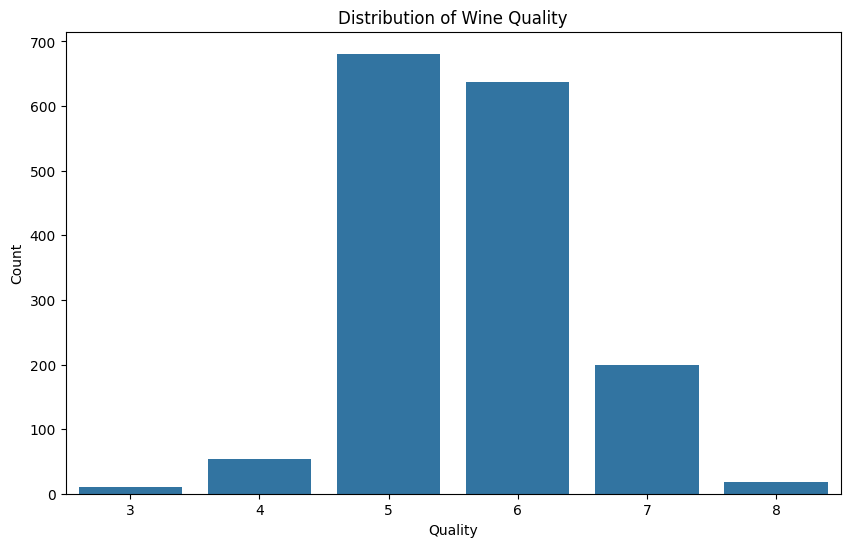

In [7]:
# Visualize Distribution Of Wine Quality.
PLT.figure(figsize=(10, 6))
SNS.countplot(x='Quality', data=Data)
PLT.title('Distribution of Wine Quality')
PLT.xlabel('Quality')
PLT.ylabel('Count')
PLT.show()

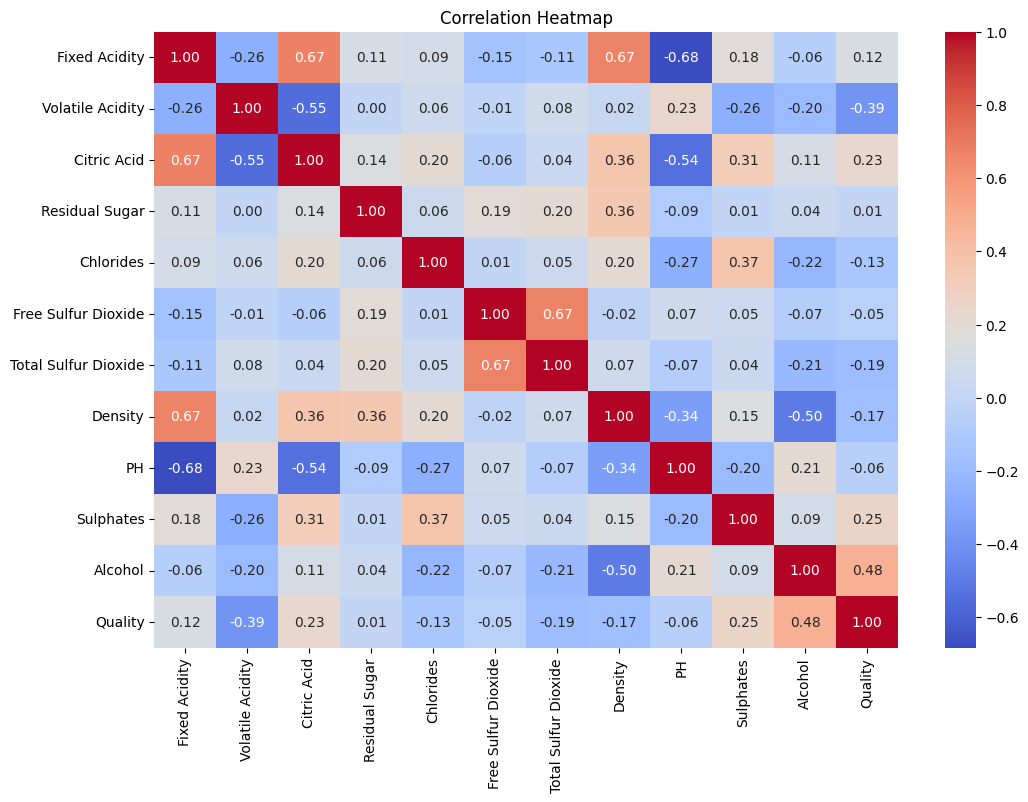

In [8]:
# Correlation Heatmap.
PLT.figure(figsize=(12, 8))
SNS.heatmap(Data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
PLT.title('Correlation Heatmap')
PLT.show()

In [9]:
# Pre-Process Data.
X_Train, X_Test, Y_Train, Y_Test = PreProcess_Data(Data, Use_SMOTE=True)

In [10]:
# Create Pipelines For Different Classifiers With Cross-Validation.
Pipelines = {
  'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=1000))]),
  'Support Vector Classifier': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
  'Random Forest Classifier': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
}

Logistic Regression:
Cross-Validation Score: 0.65

Test Accuracy: 0.39

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.27      0.10        11
           5       0.68      0.52      0.59       136
           6       0.51      0.27      0.35       128
           7       0.31      0.45      0.36        40
           8       0.00      0.00      0.00         3

    accuracy                           0.39       320
   macro avg       0.26      0.25      0.23       320
weighted avg       0.53      0.39      0.44       320



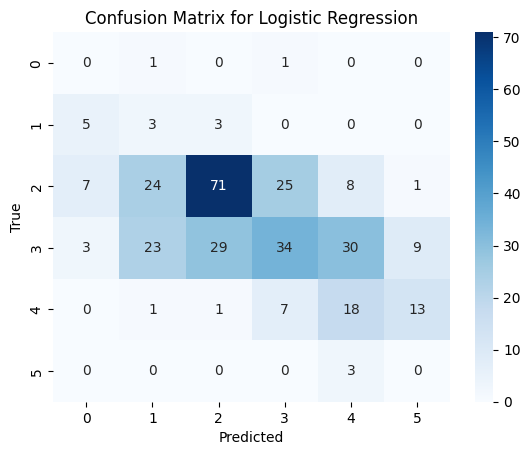

Support Vector Classifier:
Cross-Validation Score: 0.78

Test Accuracy: 0.52

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.16      0.55      0.24        11
           5       0.69      0.58      0.63       136
           6       0.60      0.44      0.50       128
           7       0.40      0.57      0.47        40
           8       0.08      0.33      0.13         3

    accuracy                           0.52       320
   macro avg       0.32      0.41      0.33       320
weighted avg       0.59      0.52      0.54       320



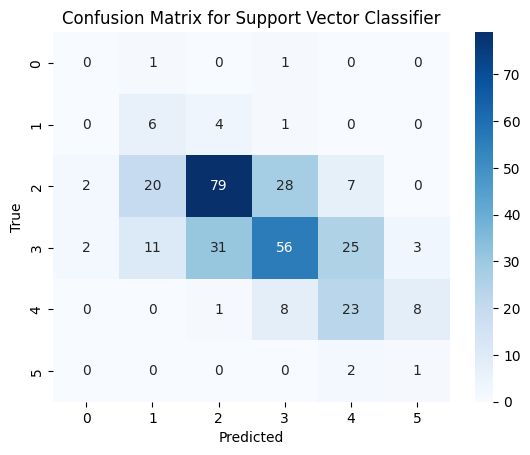

Random Forest Classifier:
Cross-Validation Score: 0.86

Test Accuracy: 0.62

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.09      0.07        11
           5       0.75      0.69      0.72       136
           6       0.66      0.61      0.63       128
           7       0.56      0.62      0.59        40
           8       0.10      0.33      0.15         3

    accuracy                           0.62       320
   macro avg       0.35      0.39      0.36       320
weighted avg       0.65      0.62      0.63       320



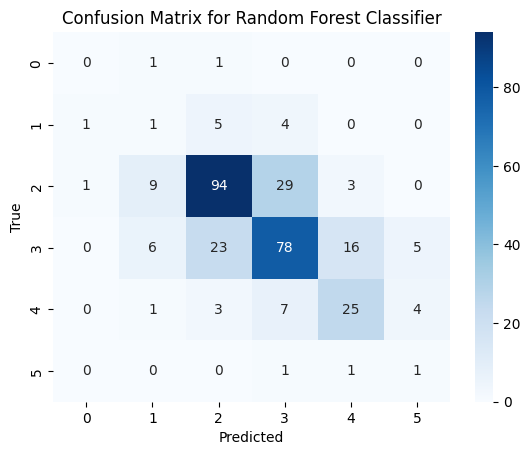

In [11]:
# Train And Evaluate Each Model With Cross-Validation.
for Model_Name, Pipeline in Pipelines.items():
  Scores = Cross_Val_Score(Pipeline, X_Train, Y_Train, cv=5)
  Pipeline.fit(X_Train, Y_Train)
  Y_Pred = Pipeline.predict(X_Test)
  Accuracy, Report, CM = Evaluate_Model(Y_Test, Y_Pred)
  print(f"{Model_Name}:\nCross-Validation Score: {Scores.mean():.2f}\n")
  print(f"Test Accuracy: {Accuracy:.2f}\n")
  print(Report)
  Plot_Confusion_Matrix(CM, Model_Name)

In [12]:
# Hyper-Parameter Tuning For SVC And Random Forest.
Param_Grid_RF = {
  'classifier__n_estimators': [100, 200],
  'classifier__max_depth': [None, 10, 20],
  'classifier__min_samples_split': [2, 5, 10]
}
Param_Grid_SVC = {
  'classifier__C': [0.1, 1, 10],
  'classifier__gamma': [1, 0.1, 0.01],
  'classifier__kernel': ['rbf']
}

# Grid Search For Random Forest.
Grid_Search_RF = GridSearchCV(Pipelines['Random Forest Classifier'], Param_Grid_RF, cv=5)
Grid_Search_RF.fit(X_Train, Y_Train)
Best_RF = Grid_Search_RF.best_estimator_

# Grid Search For SVC.
Grid_Search_SVC = GridSearchCV(Pipelines['Support Vector Classifier'], Param_Grid_SVC, cv=5)
Grid_Search_SVC.fit(X_Train, Y_Train)
Best_SVC = Grid_Search_SVC.best_estimator_

Best Random Forest Model:
Accuracy: 0.62

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.09      0.07        11
           5       0.74      0.71      0.73       136
           6       0.66      0.59      0.62       128
           7       0.52      0.62      0.57        40
           8       0.11      0.33      0.17         3

    accuracy                           0.62       320
   macro avg       0.35      0.39      0.36       320
weighted avg       0.65      0.62      0.63       320



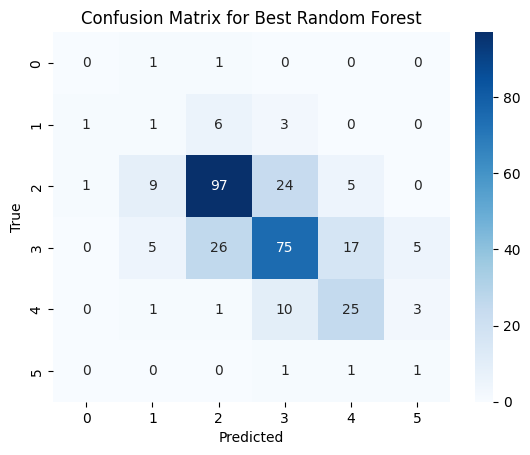

Best SVC Model:
Accuracy: 0.64

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.09      0.09      0.09        11
           5       0.69      0.70      0.70       136
           6       0.64      0.70      0.67       128
           7       0.70      0.47      0.57        40
           8       0.25      0.33      0.29         3

    accuracy                           0.64       320
   macro avg       0.40      0.38      0.38       320
weighted avg       0.64      0.64      0.64       320



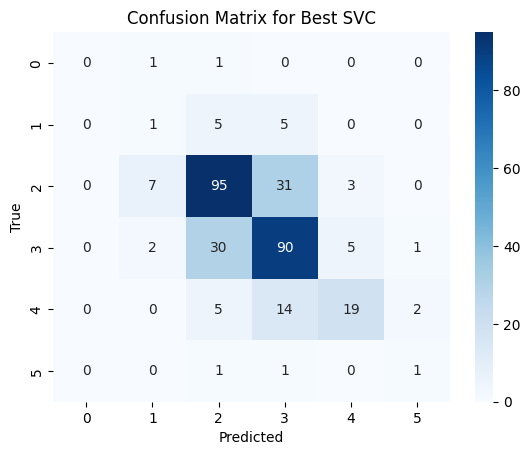

In [13]:
# Evaluate And Display Metrics For The Best Random Forest Model.
Y_Pred_Best_RF = Best_RF.predict(X_Test)
Best_RF_Accuracy, Best_RF_Report, Best_RF_CM = Evaluate_Model(Y_Test, Y_Pred_Best_RF)
print(f"Best Random Forest Model:\nAccuracy: {Best_RF_Accuracy:.2f}\n")
print(Best_RF_Report)
Plot_Confusion_Matrix(Best_RF_CM, "Best Random Forest")

# Evaluate And Display Metrics For The Best SVC Model.
Y_Pred_Best_SVC = Best_SVC.predict(X_Test)
Best_SVC_Accuracy, Best_SVC_Report, Best_SVC_CM = Evaluate_Model(Y_Test, Y_Pred_Best_SVC)
print(f"Best SVC Model:\nAccuracy: {Best_SVC_Accuracy:.2f}\n")
print(Best_SVC_Report)
Plot_Confusion_Matrix(Best_SVC_CM, "Best SVC")

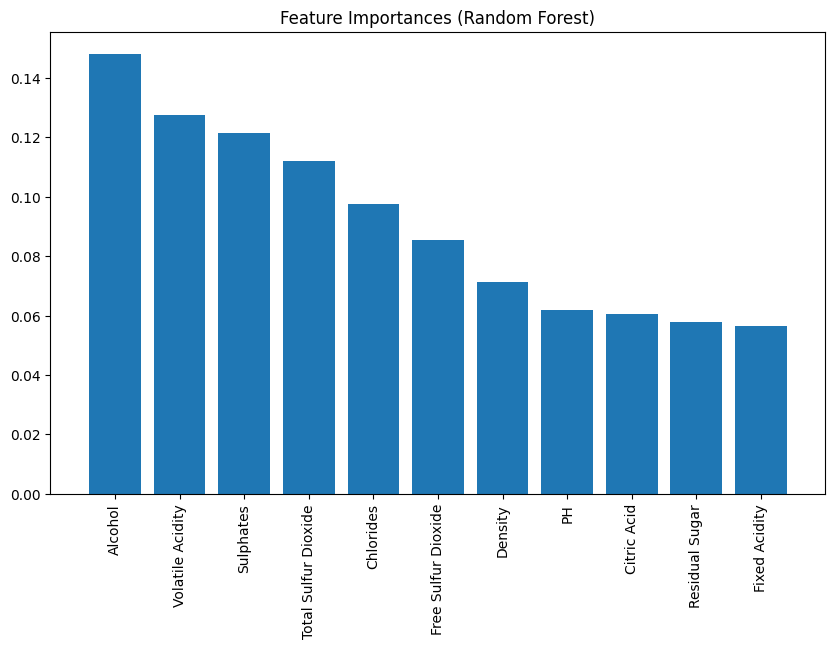

In [14]:
# Feature Importance.
Importances = Best_RF.named_steps['classifier'].feature_importances_
indices = NP.argsort(Importances)[::-1]
PLT.figure(figsize=(10, 6))
PLT.title("Feature Importances (Random Forest)")
PLT.bar(range(X_Train.shape[1]), Importances[indices], align="center")
PLT.xticks(range(X_Train.shape[1]), Data.columns[indices], rotation=90)
PLT.xlim([-1, X_Train.shape[1]])
PLT.show()

In [15]:
# Save The Model And Scaler.
JobLib.dump(Best_RF, 'Best_RF_Wine_Model.pkl')
JobLib.dump(Best_SVC, 'Best_SVC_Wine_Model.pkl')
JobLib.dump(StandardScaler().fit(X_Train), 'Scaler.pkl')

['Scaler.pkl']